In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

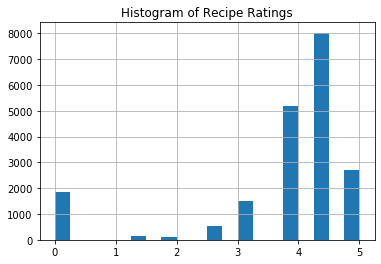

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [ ]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)

In [92]:
Y

235      3.125
12172    3.750
5192     4.375
17289    4.375
10955    5.000
         ...  
15578    3.750
3314     3.750
17437    3.750
6696     5.000
13130    3.750
Name: rating, Length: 6016, dtype: float64

### re-formulate the problem
- transform the problem from regression to binary classification problem, i.e. raing >3.5 = good, otherwise = bad
- just work on the sample data for practice.
- note that the reason to pick 3.5 instead of 2.5 is the rating distribution is very skewed.
- also, use selectKbest to select best 50 features instead of using all of them.

In [94]:
# work on the light weighted dataset
df_sample_ft = pd.DataFrame(np.array(X)).copy()
df_sample_ft.columns = X.columns.copy()
# df_sample_ft['#cakeweek'].nunique()

            
df_sample_target = pd.DataFrame(np.array(Y)).copy()
df_sample_target.columns = [Y.name]
df_sample_target

Y_binary = []
for row in df_sample_target.index:
    if df_sample_target.iloc[row,0] > 3.5:
#         print(df_sample_target.iloc[row,0])
        rating_binary = "good"
    else:
        rating_binary = "bad"
    Y_binary.append(rating_binary)

df_sample_target_binary = pd.DataFrame(Y_binary)
df_sample_target_binary.columns = [Y.name]
# df_sample_target_binary

In [95]:
# note that all the features are one-hot-encoded
for col in df_sample_ft.columns:
    if df_sample_ft[col].nunique() > 2:
        print(col)

In [96]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func = chi2, k=30)
feature_fit = bestfeatures.fit(df_sample_ft, df_sample_target_binary)
sample_ft_best = feature_fit.transform(df_sample_ft)
# df_sample_ft_best
mask = feature_fit.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, df_sample_ft.columns):
    if bool:
        new_features.append(feature)

df_sample_ft_best = pd.DataFrame(sample_ft_best)
df_sample_ft_best.columns = new_features
df_sample_ft_best

,3-ingredient recipes,alcoholic,bake,bitters,bon appétit,breadcrumbs,campari,cheese,cocktail,cocktail party,...,onion,pickles,pineapple,roast,rum,rye,salad dressing,sauté,spirit,tomato
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6012,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now we can train the data

In [97]:
from sklearn.svm import SVC
svc = SVC()


In [98]:
from sklearn.model_selection import cross_val_score


cross_val_score(svc, df_sample_ft_best, df_sample_target_binary, cv=5)

C:\Users\kefei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kefei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kefei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kefei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.80980066, 0.7996675 , 0.80881131, 0.80133001, 0.80548628])

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc.fit(df_sample_ft_best, df_sample_target_binary)
y_pred=svc.predict(df_sample_ft_best)

print('classification_report')
print(classification_report(df_sample_target_binary,y_pred))
print('----------------------------')
print('accuracy_score')
print(accuracy_score(df_sample_target_binary, y_pred))

C:\Users\kefei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


classification_report
              precision    recall  f1-score   support

         bad       0.81      0.18      0.29      1272
        good       0.82      0.99      0.90      4744

    accuracy                           0.82      6016
   macro avg       0.81      0.58      0.59      6016
weighted avg       0.82      0.82      0.77      6016

----------------------------
accuracy_score
0.8173204787234043


In [100]:
df_sample_target_binary['rating'].unique()

array(['bad', 'good'], dtype=object)

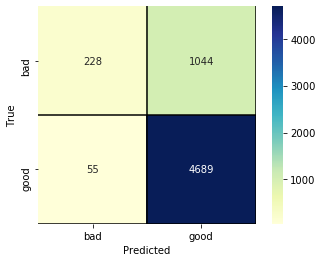

In [101]:
labels = df_sample_target_binary['rating'].unique()
cf_matrix = confusion_matrix(df_sample_target_binary,y_pred, labels=labels)
X_axis_labels = labels
Y_axis_labels = labels

ax = sns.heatmap(cf_matrix, xticklabels=X_axis_labels, yticklabels=Y_axis_labels, annot=True, fmt="d", cmap="YlGnBu",square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
ax.hlines(np.arange(1,7), *ax.get_xlim())
ax.vlines(np.arange(1,7), *ax.get_ylim())

## sumary
- After we transformed the task from regression problem to a classification one, and also simplify the catigory numbers, the performance has improved from 0.1 to 0.8 (not super good but much better)
- Also, by selecting only top 30 best featuers, the computation time decreased.
- The 0.8 accuracy for binary classification task is far from impressive, there should be ways to improve the performance.
- We only use default hyperparameter setting for SVM classifier, which can be improved.
- We didn't evaluate performance on test set, which should be done in order to avoid overfitting issue.